In [104]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# My first linear regression project

In [6]:
df = pd.read_csv('encommerce.csv')
df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [12]:
df.describe().T

count        mean        std         min         25%  \
Avg. Session Length   500.0   33.053194   0.992563   29.532429   32.341822   
Time on App           500.0   12.052488   0.994216    8.508152   11.388153   
Time on Website       500.0   37.060445   1.010489   33.913847   36.349257   
Length of Membership  500.0    3.533462   0.999278    0.269901    2.930450   
Yearly Amount Spent   500.0  499.314038  79.314782  256.670582  445.038277   

                             50%         75%         max  
Avg. Session Length    33.082008   33.711985   36.139662  
Time on App            11.983231   12.753850   15.126994  
Time on Website        37.069367   37.716432   40.005182  
Length of Membership    3.533975    4.126502    6.922689  
Yearly Amount Spent   498.887875  549.313828  765.518462

## Exploratory data

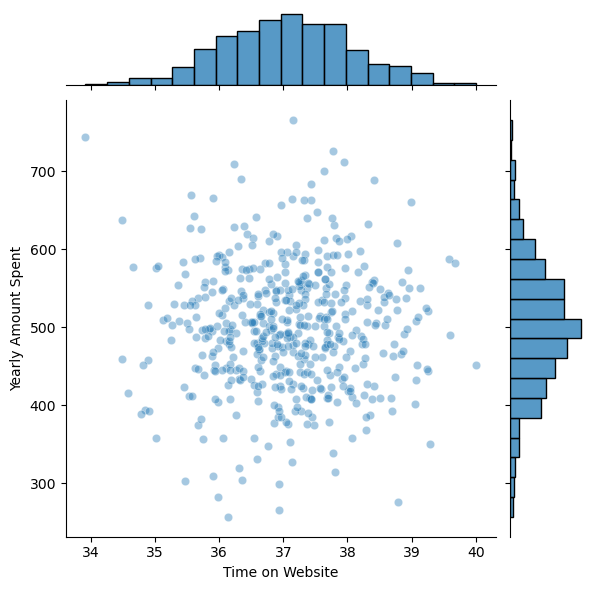

In [15]:
sns.jointplot(x=df['Time on Website'], y = df['Yearly Amount Spent'], alpha = 0.4)

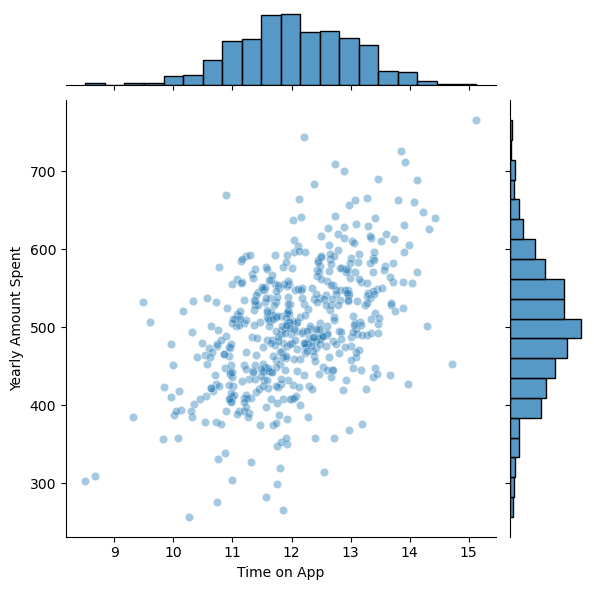

In [16]:
sns.jointplot(x = df['Time on App'], y = df['Yearly Amount Spent'], alpha = 0.4)

### Correlation for all numeric features

Correlation for all numeric features


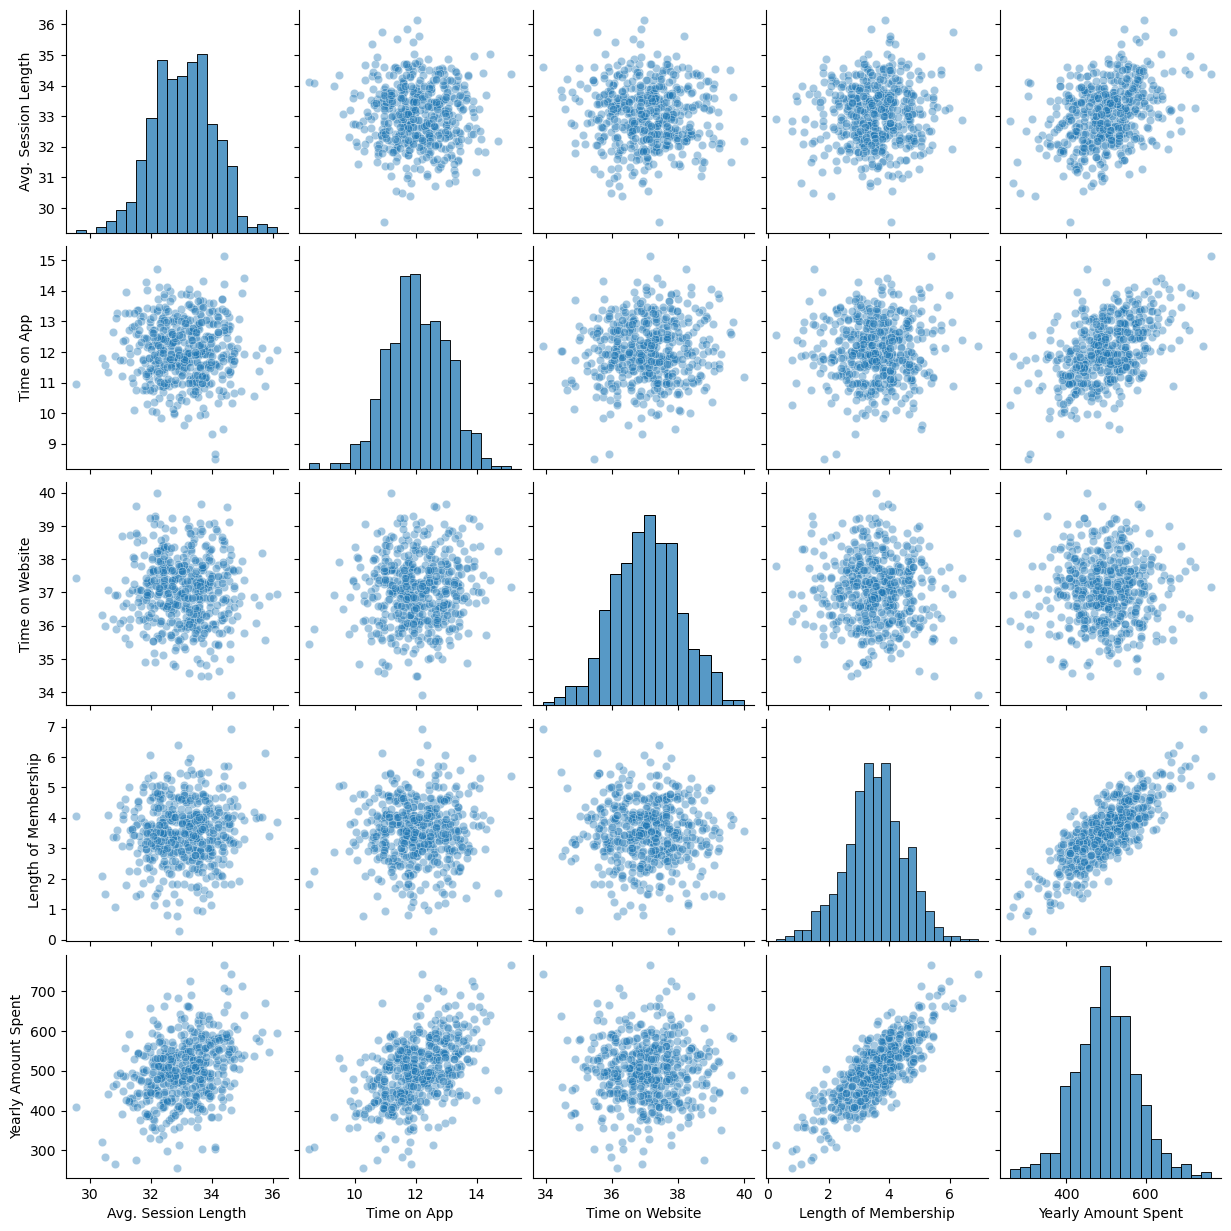

In [91]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha': 0.4}) 

Text(0.5, 1.0, 'Line of Linear Regression model')

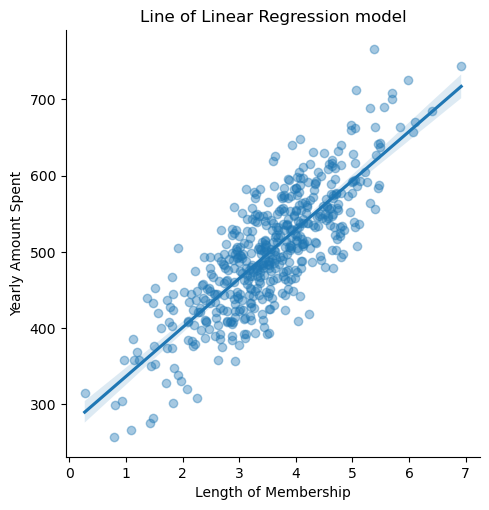

In [92]:
sns.lmplot(x='Length of Membership', y = 'Yearly Amount Spent', data = df, scatter_kws = {'alpha': 0.4}) #linear model plot
plt.title("Line of Linear Regression model")

## Splitting data for train and test (70/30)

In [20]:
from sklearn.model_selection import train_test_split

In [25]:
X = df[['Time on App', 'Avg. Session Length', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [30]:
print(X_train.shape); print(X_test.shape)

(350, 4)
(150, 4)


In [31]:
print(y_train.shape); print(y_test.shape)

(350,)
(150,)


## Training the model

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)

LinearRegression()

In [64]:
lin_mod.coef_

array([38.68038532, 25.50605575,  0.82755329, 61.52790775])

In [65]:
coef_pd = pd.DataFrame(lin_mod.coef_, X.columns, columns = ['coef_'])
coef_pd.sort_values(by = 'coef_', ascending = False) #sorting on impact of variable (top-bottom)

coef_
Length of Membership  61.527908
Time on App           38.680385
Avg. Session Length   25.506056
Time on Website        0.827553

In [103]:
lin_mod.intercept_ #bios or w0

-1058.2154854248008

## Making predictions

In [66]:
predictions = lin_mod.predict(X_test)

In [67]:
predictions

array([609.02088749, 402.08871294, 531.85515577, 472.57442228,
       528.18195278, 494.90296401, 676.93271576, 481.26649585,
       468.54501999, 458.41168673, 519.44939944, 530.806351  ,
       608.65460458, 399.58054721, 489.3871108 , 570.02903819,
       456.08254898, 462.52226181, 516.76548568, 460.26082563,
       451.07937933, 305.78270415, 518.03458948, 553.6665787 ,
       589.27286157, 514.66902886, 582.35071704, 479.64828714,
       512.66805027, 448.20859194, 506.89201607, 588.26848852,
       313.12503812, 609.33152485, 395.68418928, 472.70232156,
       672.58456582, 481.21138575, 390.31041176, 622.9799469 ,
       435.58121041, 587.80893177, 553.30619331, 571.31725019,
       533.69312741, 497.56621363, 487.59698777, 518.79370083,
       571.63549205, 548.21758373, 556.07048255, 579.58187802,
       553.99466711, 442.30164403, 377.78964088, 395.45382219,
       481.38327549, 538.80087788, 491.18022479, 471.69472415,
       580.67542926, 412.24913581, 517.51713851, 456.94

In [68]:
data = {'Predictions': predictions, 'Actual values': y_test}
resultdf = pd.DataFrame(data).reset_index(drop = True).head(15)
resultdf.head(15)

Predictions  Actual values
0    609.020887     612.385230
1    402.088713     399.983872
2    531.855156     534.771485
3    472.574422     484.519809
4    528.181953     528.223809
5    494.902964     502.771075
6    676.932716     689.235700
7    481.266496     496.650708
8    468.545020     461.628278
9    458.411687     452.122625
10   519.449399     514.009818
11   530.806351     529.194519
12   608.654605     608.271817
13   399.580547     393.857371
14   489.387111     482.602467

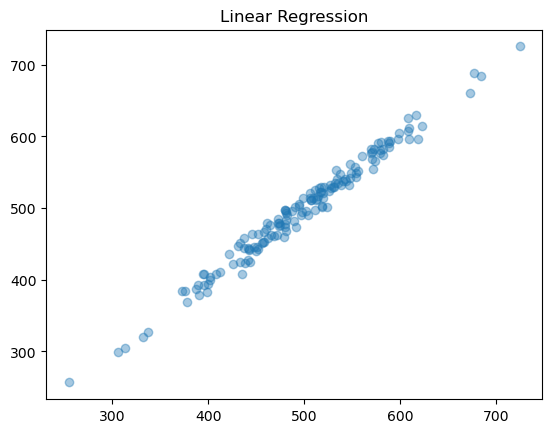

In [86]:
plt.plot(figsize = (50, 50))
plt.scatter(x=predictions, y=y_test, alpha = 0.4)
plt.title('Linear Regression')
plt.show()

### Another way to visualize

Text(0, 0.5, 'Actual Values')

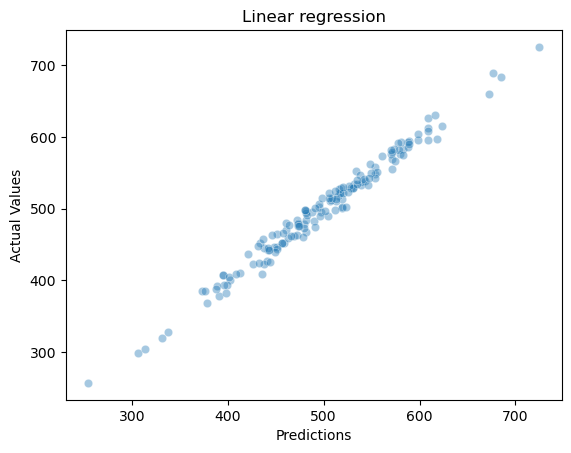

In [84]:
sns.scatterplot(x = predictions, y = y_test, alpha = 0.4)
plt.title('Linear regression')
plt.xlabel('Predictions')
plt.ylabel('Actual Values')

## Metrics routine

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [89]:
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, predictions));
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, predictions));
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error (MAE):  8.24069279766336
Mean Squared Error (MSE):  102.41473729307971
RMSE:  10.12001666466413


## Residuals

In [93]:
residuals = y_test - predictions

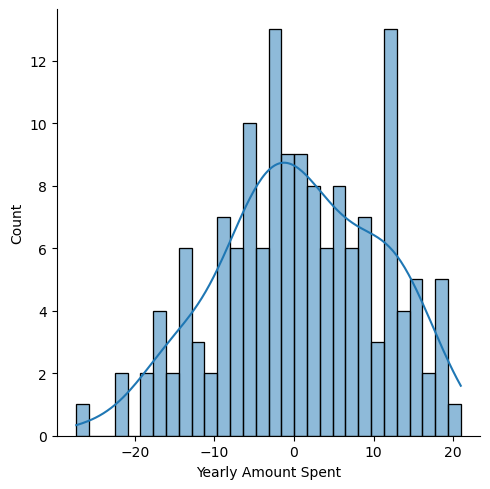

In [101]:
sns.displot(residuals, bins = 30, kde=True)